In [1]:
import sys
sys.path.append("..")

from plotting_tools import *

In [2]:
# These values were calculated from simulations using the 100 selected particles in the final fitting generation 
mean_loc_size = {'Home': 1.67, 'School': 41.55, 'Work': 14.38, 'Recreation': 41.63, 'Shop': 89.44}
mean_infections = {'Home': 7122.17, 'School': 1419.24, 'Work': 16144.79, 'Recreation': 1811.24, 'Shop': 18.41}
mean_max_contacts = {'Home': 7.0, 'School': 45.0, 'Work': 40.0, 'Recreation': 983.79, 'Shop': 82.3}

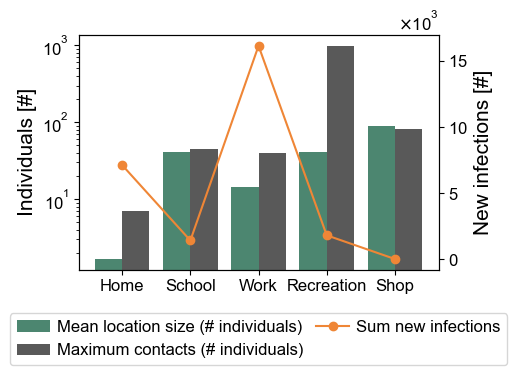

In [4]:
fig = plt.figure(figsize=(5, 3.5))
ax1 = fig.add_axes([0.14, 0.31, 0.72, 0.67])
ax2 = ax1.twinx()
bar_width = 0.4
x = np.arange(len(mean_loc_size.keys()))
# Mean location size bars
bar_colors1 = [colors['Teal'] for _ in range(len(mean_loc_size.keys()))]
bar1 = ax1.bar(x - bar_width/2, mean_loc_size.values(), bar_width, color = bar_colors1, label = 'Mean location size (# individuals)')
# Mean maximum contacts bars
bar_colors2 = [colors['Dark grey'] for _ in range(len(mean_loc_size.keys()))]
bar2 = ax1.bar(x + bar_width/2, mean_max_contacts.values(), bar_width, color = bar_colors2, label = 'Maximum contacts (# individuals)')
ax1.set_yscale('log')
ax1.set_ylabel('Individuals [#]')
# New infections
line1, = ax2.plot(mean_loc_size.keys(), mean_infections.values(), color = colors['Orange'], marker='o', label = 'Sum new infections')
ax2.set_ylabel('New infections [#]')

ax1.set_xticks(x)
ax1.set_xticklabels(mean_loc_size.keys())
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((3, 3))
ax2.yaxis.set_major_formatter(formatter)
lines = [bar1, bar2, line1]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, columnspacing=0.78, handletextpad=0.4)
plt.subplots_adjust(bottom=0.28, left=0.15, top=0.92, right=0.85)
fig.savefig('mean_loc_size.png', dpi=dpi)
plt.show()